<a href="https://colab.research.google.com/github/shekhar5908/Life-Expectancy/blob/main/Life_expentancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats.mstats as winsorize
import sklearn.decomposition as pca
import sklearn.preprocessing as scale
import os
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

## Loading file

In [135]:
df = pd.read_csv("/content/drive/MyDrive/statistics project 1/Life Expectancy Data.csv")

In [136]:
df.head(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

# Data Preprocessing

In [137]:
#finding size to dataset
df.size

64636

In [138]:
# showing shape of dataset
df. shape

(2938, 22)

In [139]:
# showing names of all columns in dataset
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

##making all colums into lower caps


In [140]:
orig_col = list(df.columns)
new_col = list()
for col in orig_col:
  new_col.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_col

In [141]:
df.head(5)

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness_1-19_years  thinness_5-9_years  income_composition_of_resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

##changing thinness '1-19' to '10 - 9' because it is more logical

In [142]:
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [143]:
df.head(5)

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness_10-19_years  thinness_5-9_years  income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

##cleaning of dataset

In [145]:
# finding the missing value
df.describe().iloc[:,1:]

life_expectancy  adult_mortality  infant_deaths      alcohol  \
count      2928.000000      2928.000000    2938.000000  2744.000000   
mean         69.224932       164.796448      30.303948     4.602861   
std           9.523867       124.292079     117.926501     4.052413   
min          36.300000         1.000000       0.000000     0.010000   
25%          63.100000        74.000000       0.000000     0.877500   
50%          72.100000       144.000000       3.000000     3.755000   
75%          75.700000       228.000000      22.000000     7.702500   
max          89.000000       723.000000    1800.000000    17.870000   

       percentage_expenditure  hepatitis_b        measles          bmi  \
count             2938.000000  2385.000000    2938.000000  2904.000000   
mean               738.251295    80.940461    2419.592240    38.321247   
std               1987.914858    25.070016   11467.272489    20.044034   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.685343    77.000000       0.000000    19.300000   
50%                 64.912906    92.000000      17.000000    43.500000   
75%                441.534144    97.000000     360.250000    56.200000   
max              19479.911610    99.000000  212183.000000    87.300000   

       under-five_deaths        polio  total_expenditure   diphtheria  \
count        2938.000000  2919.000000         2712.00000  2919.000000   
mean           42.035739    82.550188            5.93819    82.324084   
std           160.445548    23.428046            2.49832    23.716912   
min             0.000000     3.000000            0.37000     2.000000   
25%             0.000000    78.000000            4.26000    78.000000   
50%             4.000000    93.000000            5.75500    93.000000   
75%            28.000000    97.000000            7.49250    97.000000   
max          2500.000000    99.000000           17.60000    99.000000   

          hiv/aids            gdp    population  thinness_10-19_years  \
count  2938.000000    2490.000000  2.286000e+03           2904.000000   
mean      1.742103    7483.158469  1.275338e+07              4.839704   
std       5.077785   14270.169342  6.101210e+07              4.420195   
min       0.100000       1.681350  3.400000e+01              0.100000   
25%       0.100000     463.935626  1.957932e+05              1.600000   
50%       0.100000    1766.947595  1.386542e+06              3.300000   
75%       0.800000    5910.806335  7.420359e+06              7.200000   
max      50.600000  119172.741800  1.293859e+09             27.700000   

       thinness_5-9_years  income_composition_of_resources    schooling  
count         2904.000000                      2771.000000  2775.000000  
mean             4.870317                         0.627551    11.992793  
std              4.508882                         0.210904     3.358920  
min              0.100000                         0.000000     0.000000  
25%              1.500000                         0.493000    10.100000  
50%              3.300000                         0.677000    12.300000  
75%              7.200000                         0.779000    14.300000  
max             28.600000                         0.948000    20.700000

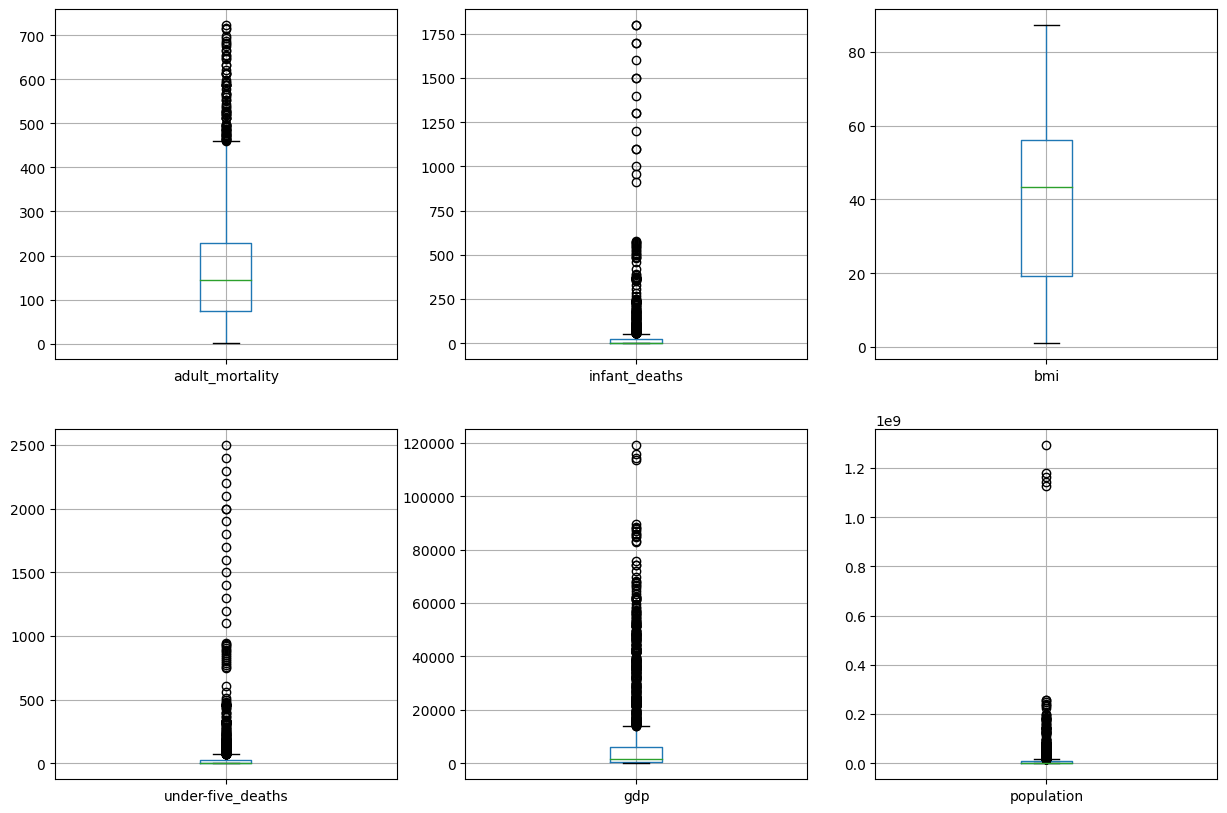

In [146]:
# making a box plot form some of the attributes showing some insignificant (not making sense) values
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
      plt.subplot(2, 3, i)
      df.boxplot(col)


In [147]:
# making adult_mortality < 5 percentile to nan
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)

In [148]:
# replacing infant_mortality_rate 0 to nan
df.infant_deaths = df.infant_deaths.replace(0, np.nan)

In [149]:
# replacing bmi<10 or > 50 to nan
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)

In [150]:
# replacing under-five_deaths 0 to nan
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)


In [151]:
# for checking missing value again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2783 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              1482 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

In [152]:
# function using for knowing the break down for knowing how many null value in each attribute
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [153]:
nulls_breakdown()

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 155 null values: 5.28% null
[iloc = 5] infant_deaths has 848 null values: 28.86% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 1456 null values: 49.56% null
[iloc = 11] under-five_deaths has 785 null values: 26.72% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null val

###Treating the missing value

In [154]:
# dropping the bmi because it have around 50 percent of null value
df.drop(columns='bmi', inplace=True)

In [155]:
# function for filling the missing value by mean values according to the year column
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [156]:
# check it again
nulls_breakdown(df)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


###Detection and Dealing with outliers

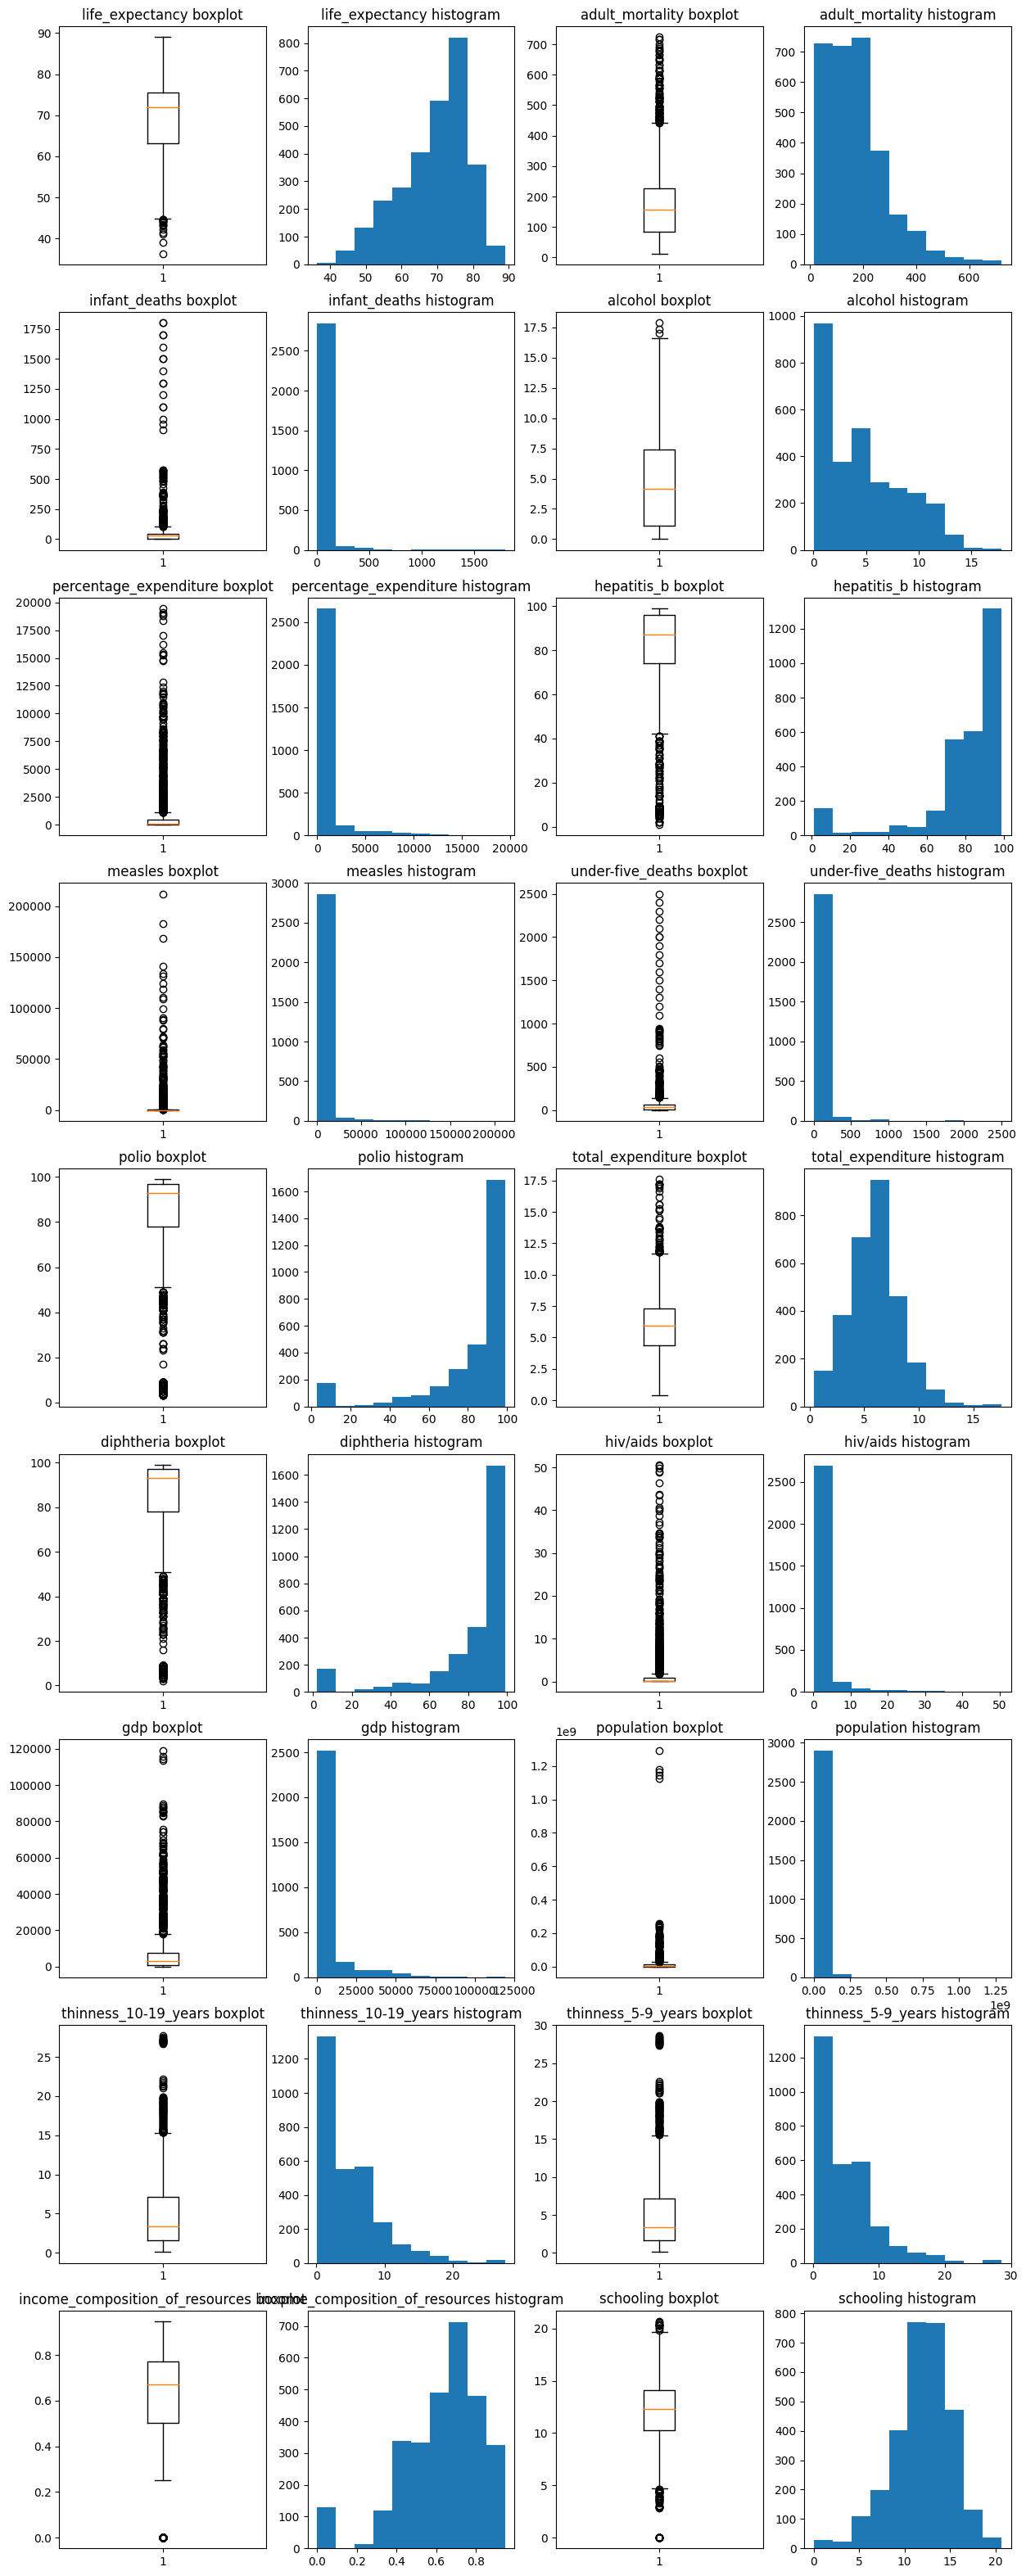

In [157]:
# using box plot and histogram for seeing outliers in every continious variable with the help function below
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

####defining outliers by turkey method (1.5 times away form IQR is outliers )

In [158]:
# defining outliers by turkey method (1.5 times away form IQR is outliers )
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [159]:
for col in cont_vars:
  outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 97
Percent of data that is outlier: 3.3%
---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------total_expenditure---------------

#### Dealing with outliears by winsorize the columns (defining upper or/and lower limit) according to the situation

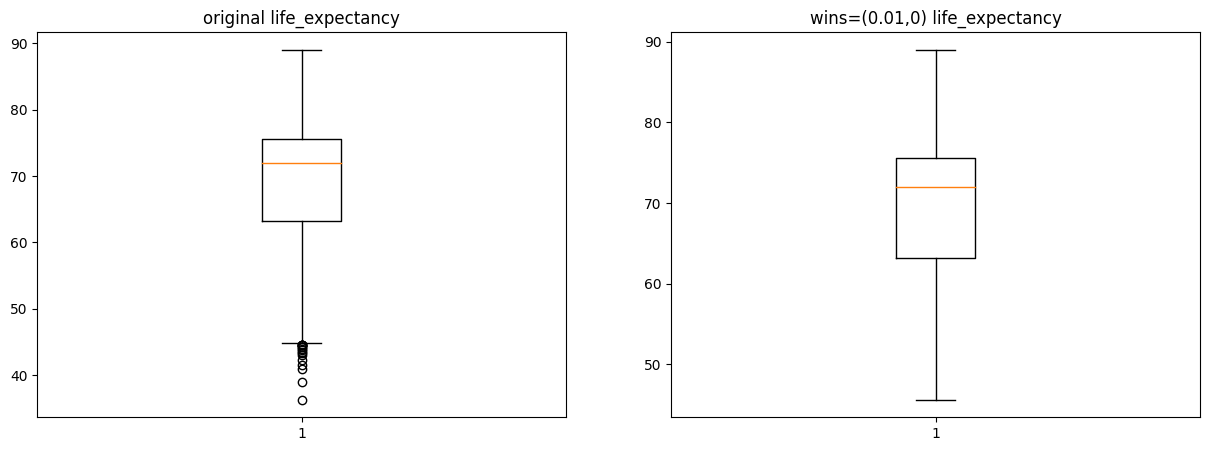

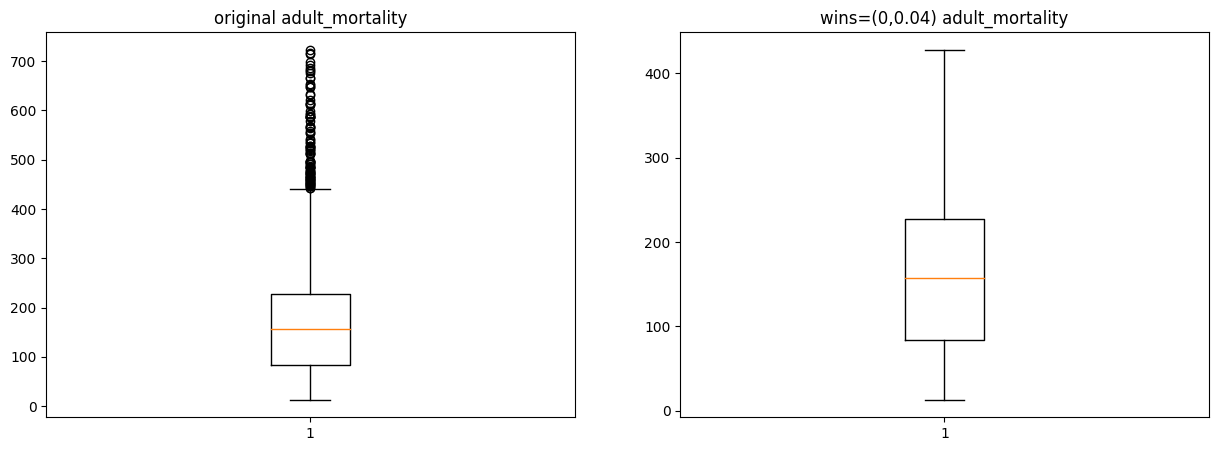

In [160]:
# Dealing with outliears by winsorize the columns (defining upper or/and lower limit) according to the situation
# making a function test_wins
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

# Initialize wins_dict
wins_dict = {}


test_wins(cont_vars[0], lower_limit=0.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=0.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

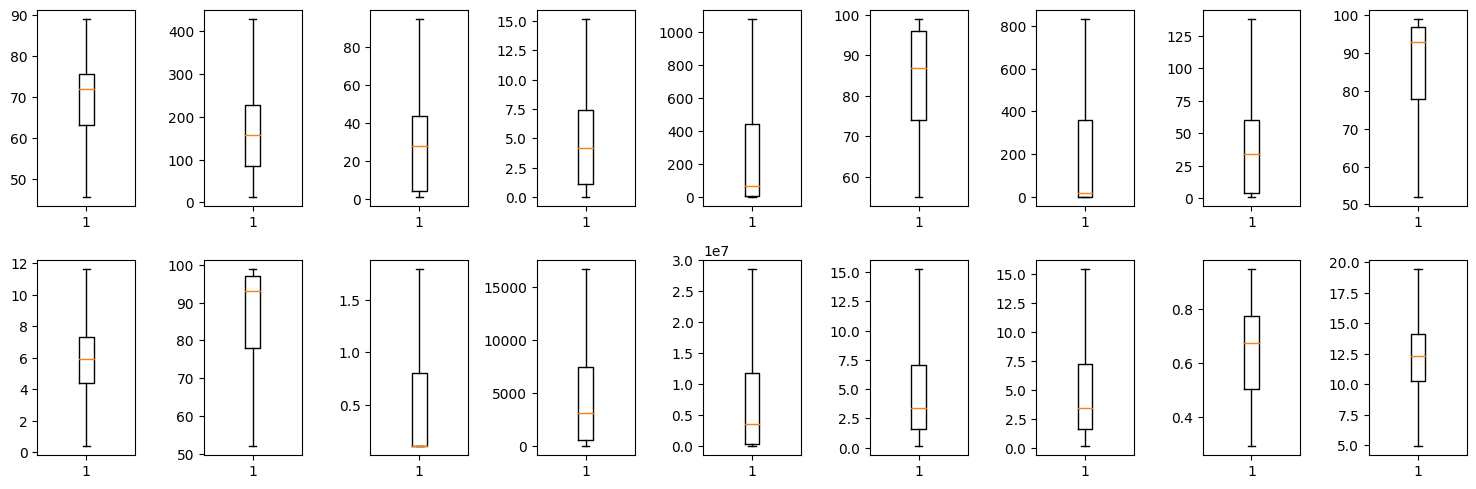

In [161]:
# now plotting the box plot to check wether the columns are winsorize or not
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

In [162]:
# Adding all first three columns to win_df
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

In [163]:
wins_df.head()

country  year      status  life_expectancy  adult_mortality  \
0           Afghanistan  2015  Developing             65.0            263.0   
16              Albania  2015  Developing             77.8             74.0   
32              Algeria  2015  Developing             75.6             19.0   
48               Angola  2015  Developing             52.4            335.0   
64  Antigua and Barbuda  2015  Developing             76.4             13.0   

    infant_deaths   alcohol  percentage_expenditure  hepatitis_b  measles  \
0       62.000000  0.010000               71.279624         65.0      831   
16      35.129032  4.600000              364.975229         99.0        0   
32      21.000000  5.288333                0.000000         95.0       63   
48      66.000000  5.288333                0.000000         64.0      118   
64      35.129032  5.288333                0.000000         99.0        0   

    ...  polio  total_expenditure  diphtheria  hiv/aids           gdp  \
0   ...   52.0               8.16        65.0       0.1    584.259210   
16  ...   99.0               6.00        99.0       0.1   3954.227830   
32  ...   95.0               7.08        95.0       0.1   4132.762920   
48  ...   52.0               7.08        64.0       1.8   3695.793748   
64  ...   86.0               7.08        99.0       0.2  13566.954100   

      population  thinness_10-19_years  thinness_5-9_years  \
0   2.865628e+07                  15.3                15.5   
16  2.887300e+04                   1.2                 1.3   
32  2.865628e+07                   6.0                 5.8   
48  2.785935e+06                   8.3                 8.2   
64  1.109741e+07                   3.3                 3.3   

    income_composition_of_resources  schooling  
0                             0.479       10.1  
16                            0.762       14.2  
32                            0.743       14.4  
48                            0.531       11.4  
64                            0.784       13.9  

[5 rows x 21 columns]

##Normalization

In [164]:
# Function to normalize a column


def normalize_column(column):
    min_val = np.min(column)
    max_val = np.max(column)
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

# Function to normalize the entire DataFrame
def normalize_dataframe(wins_df, exclude_column):
    normalized_df = df.copy()
    for col in df.columns:
        if col != exclude_column and df[col].dtype in ['int64', 'float64']:
            normalized_df[col] = normalize_column(df[col])
    return normalized_df

# Example usage
exclude_column = 'year'
# Assuming df is your DataFrame
normalized_df = normalize_dataframe(df, exclude_column)


In [165]:
#check whether the data is normalise

data = normalized_df["gdp"]

# Shapiro-Wilk test
statistic, p_value = shapiro(data)

# Print the results
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Statistic: 0.5672768354415894, p-value: 0.0
Sample looks Gaussian (fail to reject H0)


#Exploratory Data Analysis

In [166]:
normalized_df.tail(5)

country  year      status  life_expectancy  \
2873  Venezuela (Bolivarian Republic of)  2000  Developing         0.686907   
2889                            Viet Nam  2000  Developing         0.703985   
2905                               Yemen  2000  Developing         0.601518   
2921                              Zambia  2000  Developing         0.142315   
2937                            Zimbabwe  2000  Developing         0.184061   

      adult_mortality  infant_deaths   alcohol  percentage_expenditure  \
2873         0.218310       0.005559  0.447928                0.000000   
2889         0.177465       0.017788  0.089026                0.000000   
2905         0.336620       0.026126  0.003359                0.000000   
2921         0.846479       0.023902  0.146137                0.002342   
2937         0.918310       0.012785  0.093505                0.000000   

      hepatitis_b   measles  ...     polio  total_expenditure  diphtheria  \
2873     0.040816  0.000104  ...  0.864583           0.263494    0.773196   
2889     0.745258  0.077820  ...  0.968750           0.262333    0.969072   
2905     0.132653  0.000000  ...  0.739583           0.218804    0.742268   
2921     0.745258  0.145770  ...  0.854167           0.394080    0.855670   
2937     0.795918  0.006989  ...  0.781250           0.390598    0.783505   

      hiv/aids       gdp  population  thinness_10-19_years  \
2873  0.000000  0.039496    0.007296              0.061594   
2889  0.000000  0.039496    0.007296              0.568841   
2905  0.000000  0.039496    0.007296              0.507246   
2921  0.368317  0.002855    0.001183              0.268116   
2937  0.859406  0.004579    0.009446              0.394928   

      thinness_5-9_years  income_composition_of_resources  schooling  
2873            0.056140                         0.706751   0.512077  
2889            0.571930                         0.600211   0.502415  
2905            0.491228                         0.459916   0.371981  
2921            0.259649                         0.440928   0.463768  
2937            0.389474                         0.457806   0.473430  

[5 rows x 21 columns]

In [167]:
# Data exploration
normalized_df.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720         0.624891         0.225246       0.023045   
std       4.613841         0.180424         0.167391       0.064684   
min    2000.000000         0.000000         0.000000       0.000000   
25%    2004.000000         0.510436         0.100000       0.001668   
50%    2008.000000         0.677419         0.202817       0.015008   
75%    2012.000000         0.745731         0.301408       0.023773   
max    2015.000000         1.000000         1.000000       1.000000   

           alcohol  percentage_expenditure  hepatitis_b      measles  \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      0.259463                0.037898     0.809416     0.011403   
std       0.219476                0.102049     0.231452     0.054044   
min       0.000000                0.000000     0.000000     0.000000   
25%       0.060610                0.000241     0.745911     0.000000   
50%       0.231243                0.003332     0.877551     0.000080   
75%       0.413214                0.022666     0.969388     0.001698   
max       1.000000                1.000000     1.000000     1.000000   

       under-five_deaths        polio  total_expenditure   diphtheria  \
count        2938.000000  2938.000000        2938.000000  2938.000000   
mean            0.022486     0.828508           0.327209     0.827888   
std             0.063418     0.243271           0.140233     0.243742   
min             0.000000     0.000000           0.000000     0.000000   
25%             0.001200     0.781250           0.232153     0.783505   
50%             0.013205     0.937500           0.321532     0.938144   
75%             0.023615     0.979167           0.403947     0.979381   
max             1.000000     1.000000           1.000000     1.000000   

          hiv/aids          gdp   population  thinness_10-19_years  \
count  2938.000000  2938.000000  2938.000000           2938.000000   
mean      0.032517     0.062769     0.009858              0.171720   
std       0.100550     0.110423     0.041617              0.159225   
min       0.000000     0.000000     0.000000              0.000000   
25%       0.000000     0.004857     0.000324              0.054348   
50%       0.000000     0.026138     0.002841              0.119565   
75%       0.013861     0.062623     0.009130              0.253623   
max       1.000000     1.000000     1.000000              1.000000   

       thinness_5-9_years  income_composition_of_resources    schooling  
count         2938.000000                      2938.000000  2938.000000  
mean             0.167369                         0.662116     0.579392  
std              0.157291                         0.216468     0.157909  
min              0.000000                         0.000000     0.000000  
25%              0.052632                         0.531909     0.497585  
50%              0.115789                         0.709916     0.594203  
75%              0.249123                         0.814346     0.681159  
max              1.000000                         1.000000     1.000000

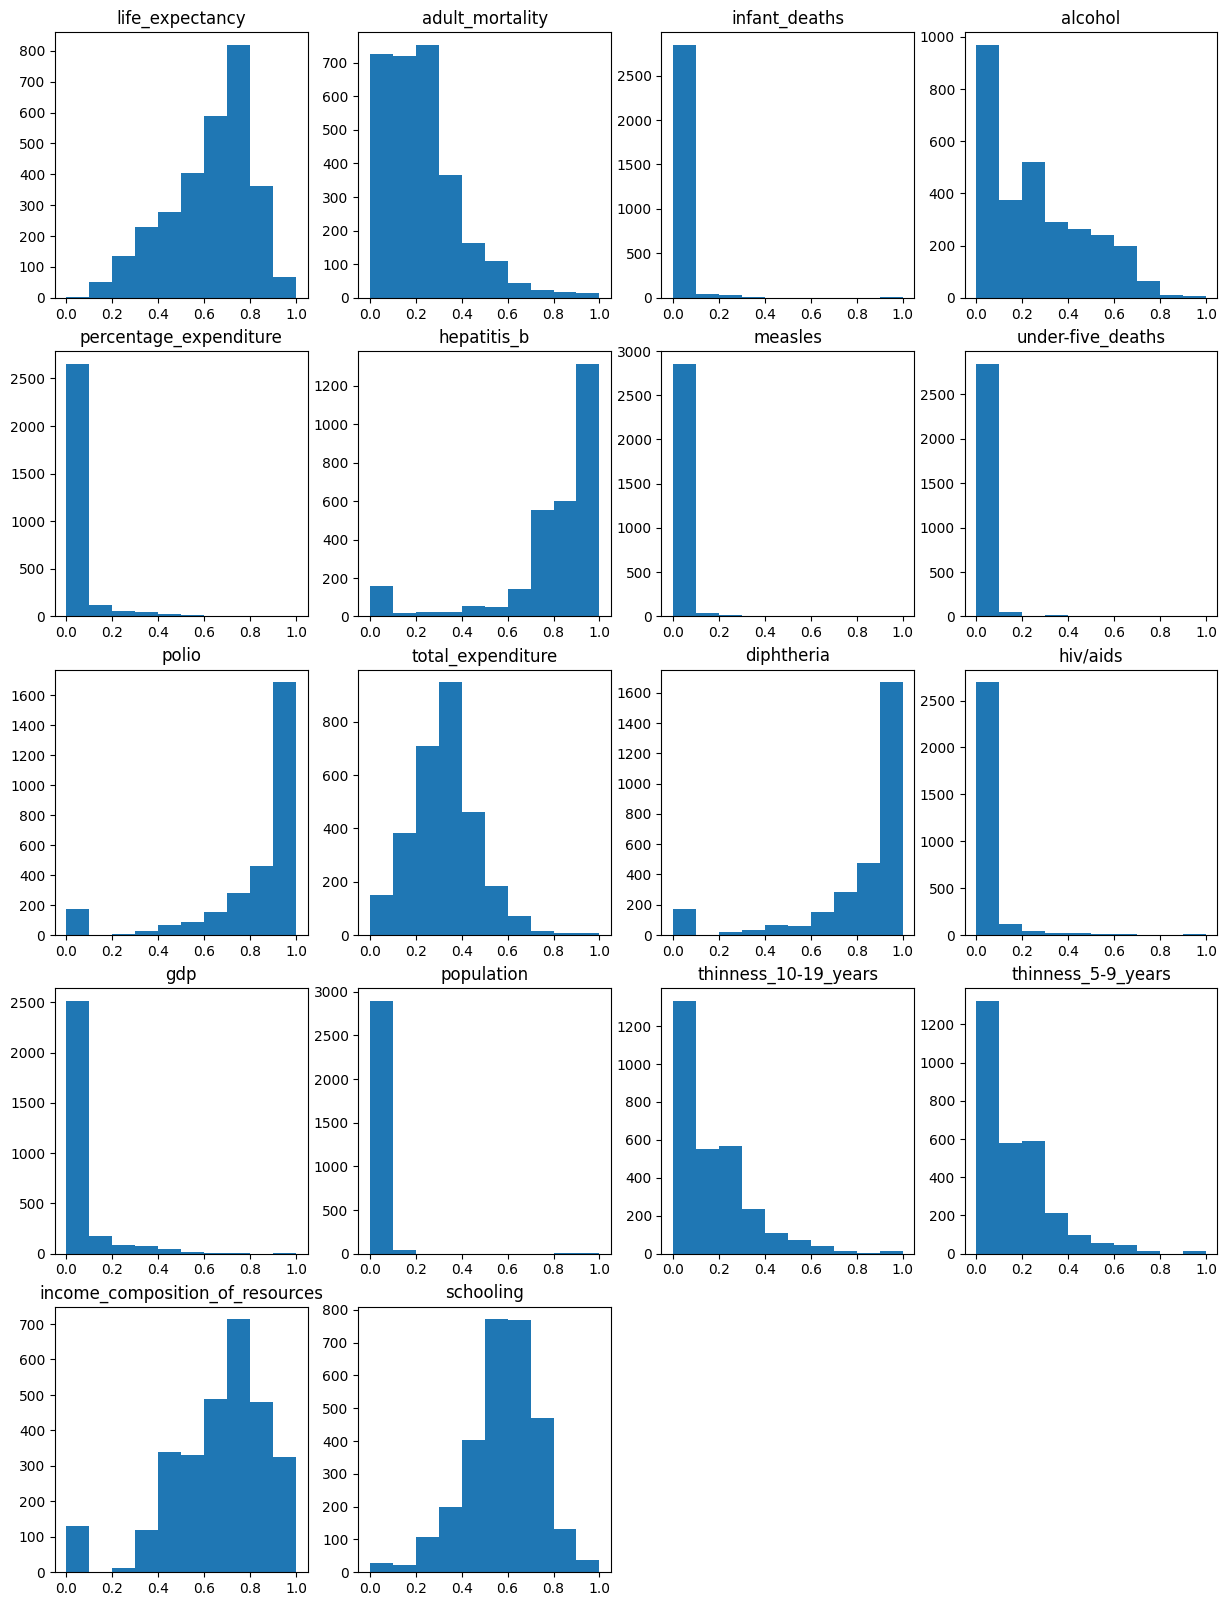

In [168]:
# Visualize the histogram of all continious variables
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(normalized_df[col])
    plt.title(col)

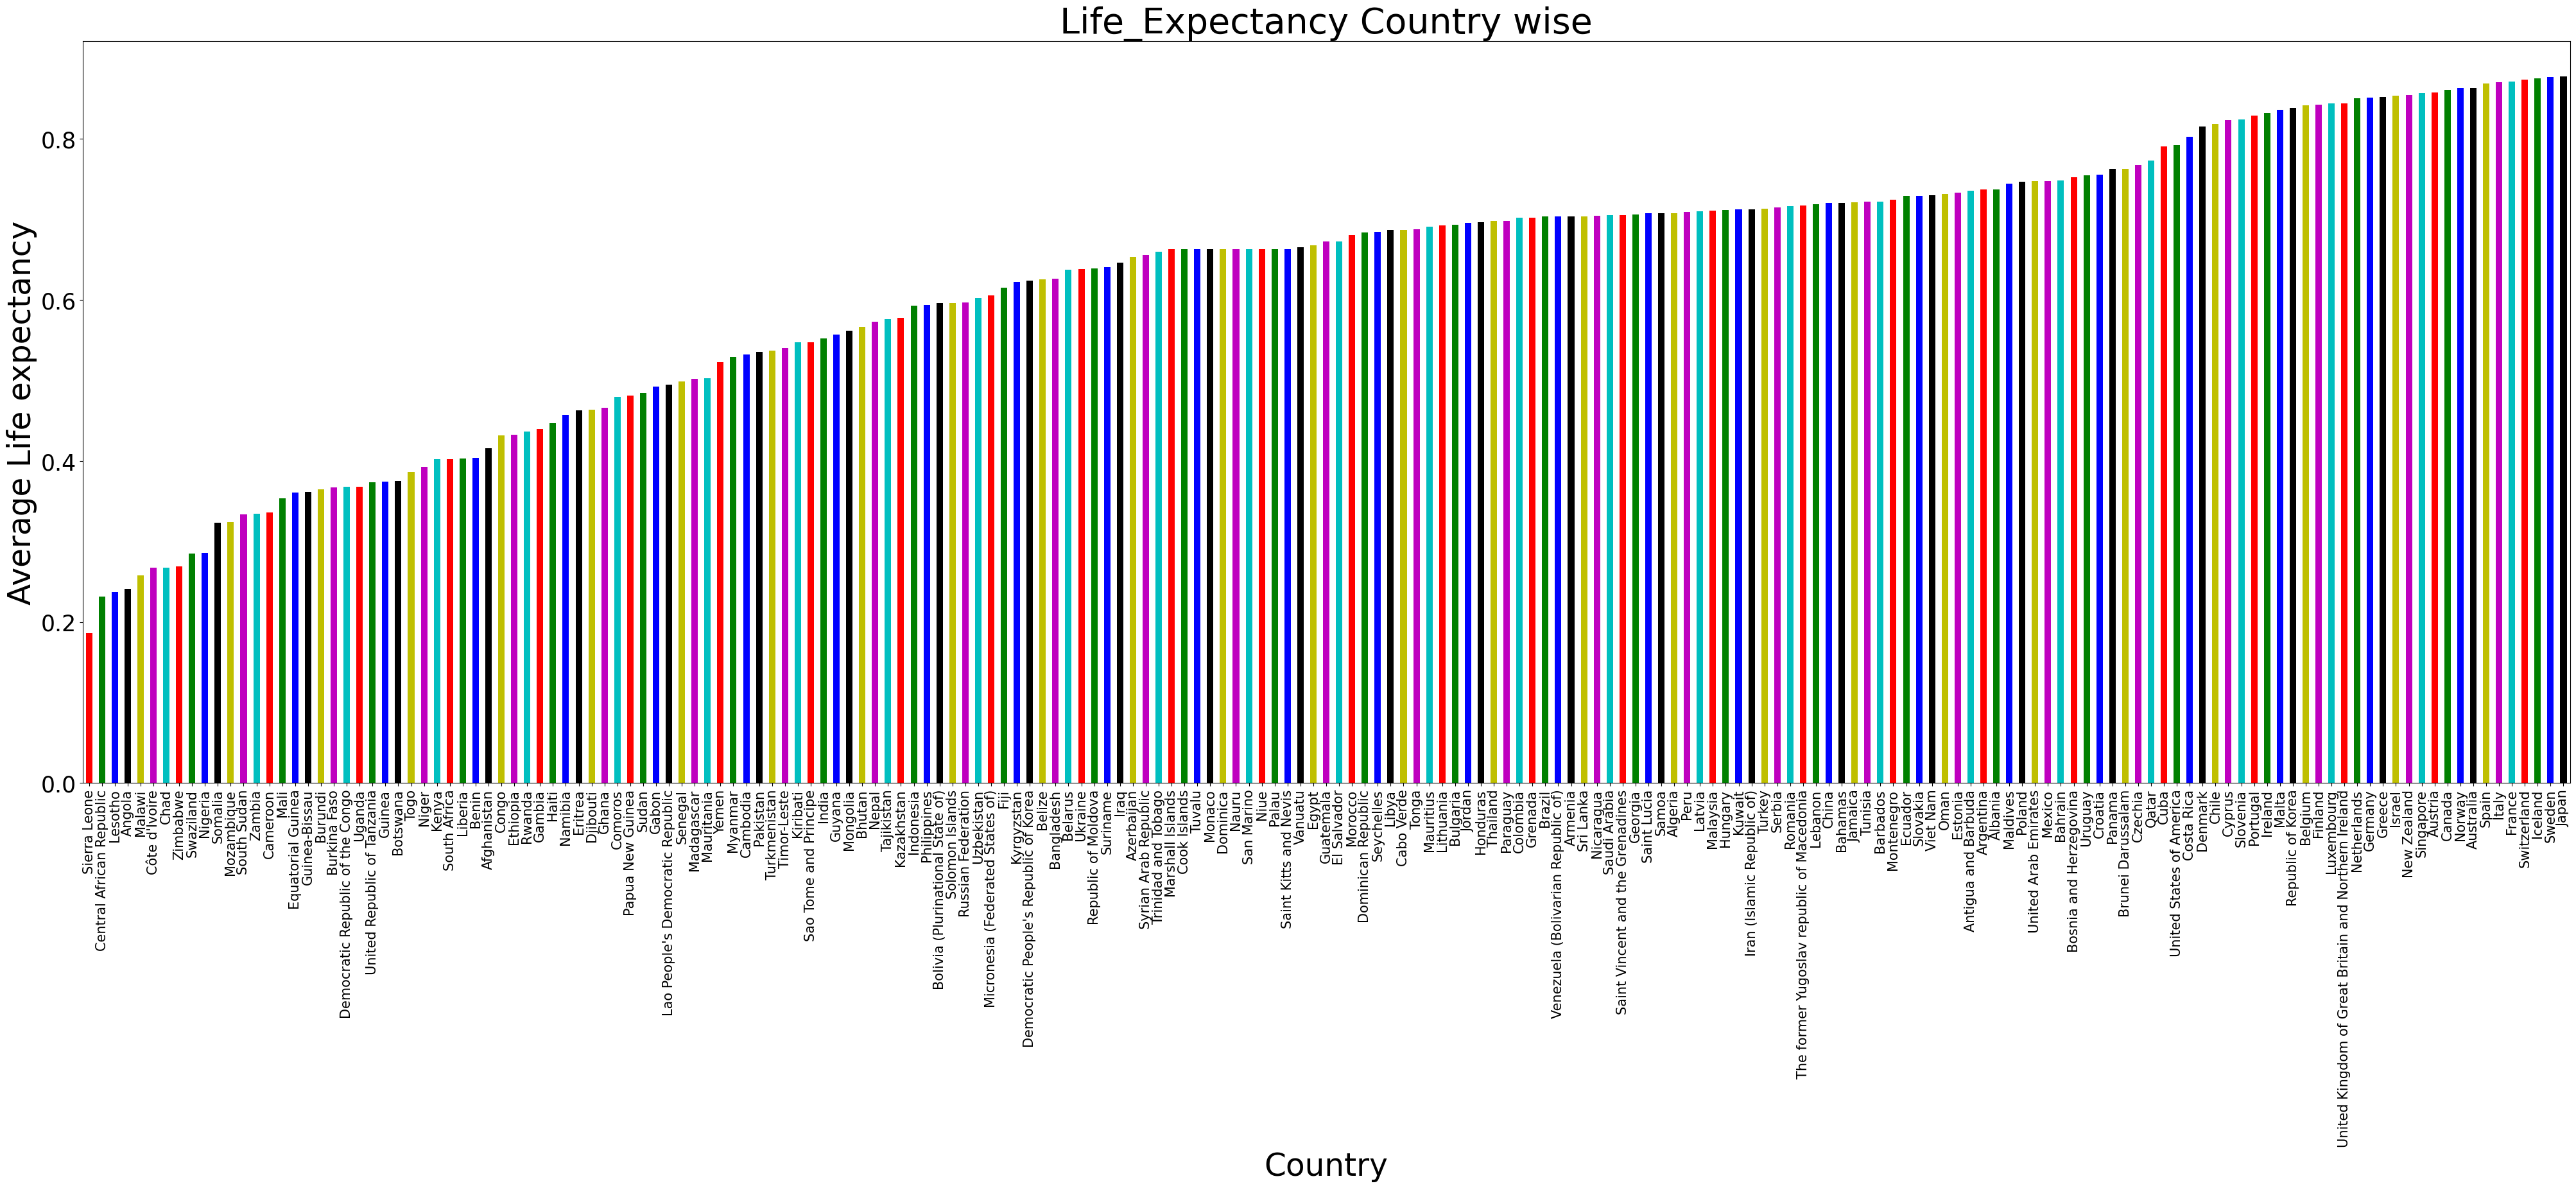

In [169]:
# bar graph for showing life expectancy country wise(normalized form)
life_country = normalized_df.groupby('country')['life_expectancy'].mean().sort_values(ascending=True)
life_country
my_colors = list('rgbkymc')
life_country.plot(kind='bar', figsize=(50,15), fontsize=25,color=my_colors)
plt.title("Life_Expectancy Country wise",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life expectancy",fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

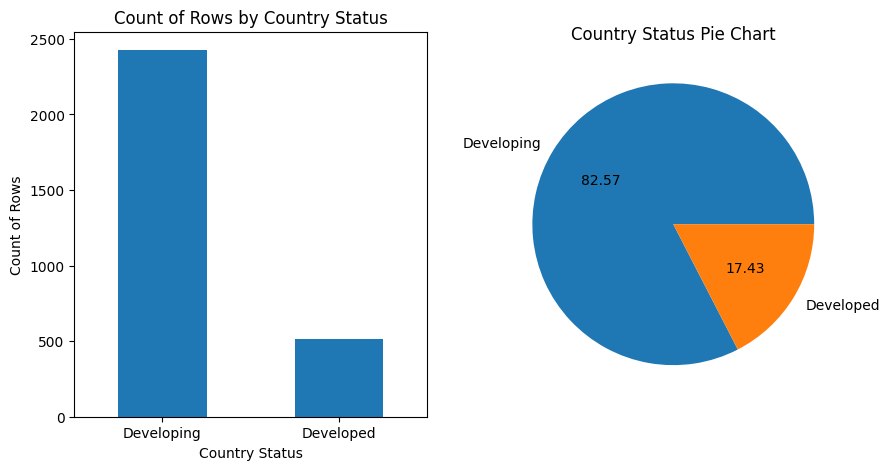

In [170]:
# explore countries status wise (developed/developing)
plt.figure(figsize=(10, 5))
plt.subplot(121)
normalized_df.status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
normalized_df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

In [171]:
#number of countries having status(developed/developing)
your_dataframe = wins_df.loc[wins_df['year'] == 2015, ['country', 'status']]
status_counts = your_dataframe['status'].value_counts()

# Print the counts
print(f"Count of countries with 'developed' status : {status_counts.get('Developed', 0)}")
print(f"Count of countries with 'developing' status : {status_counts.get('Developing', 0)}")


Count of countries with 'developed' status : 32
Count of countries with 'developing' status : 151


## Q.Showing the effect of different dieseases on Developed and Developing nations

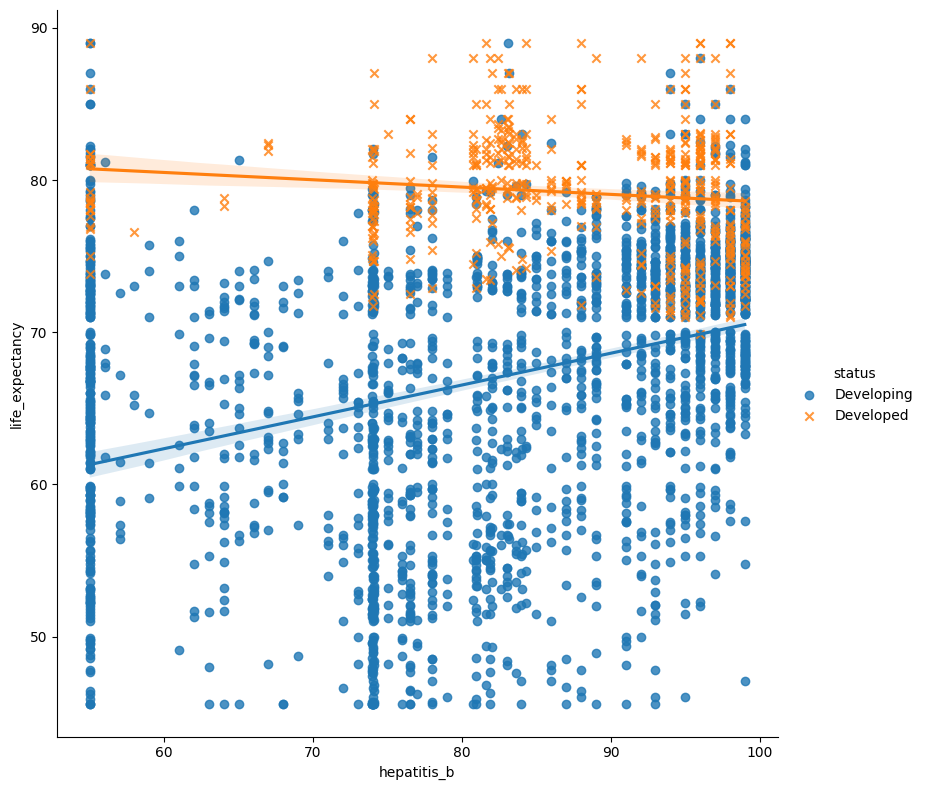

In [172]:
  # Life expectancy vs hapetities-b
sns.pairplot(wins_df, x_vars=["hepatitis_b"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");

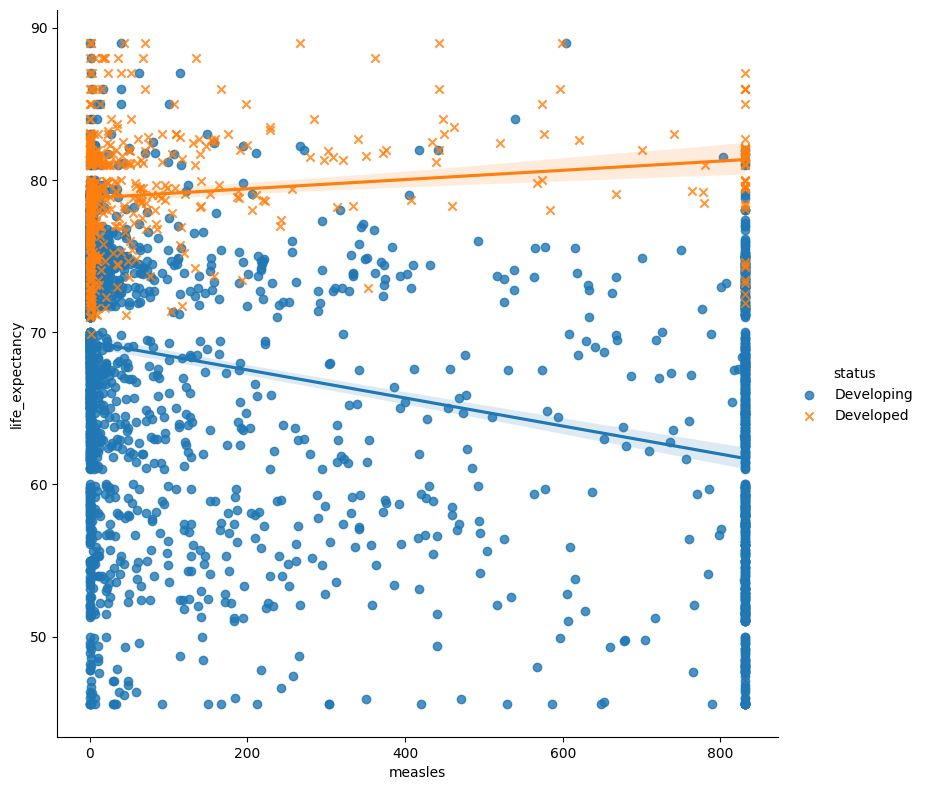

In [173]:
# Life exectancy vs measles
sns.pairplot(wins_df, x_vars=["measles"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");

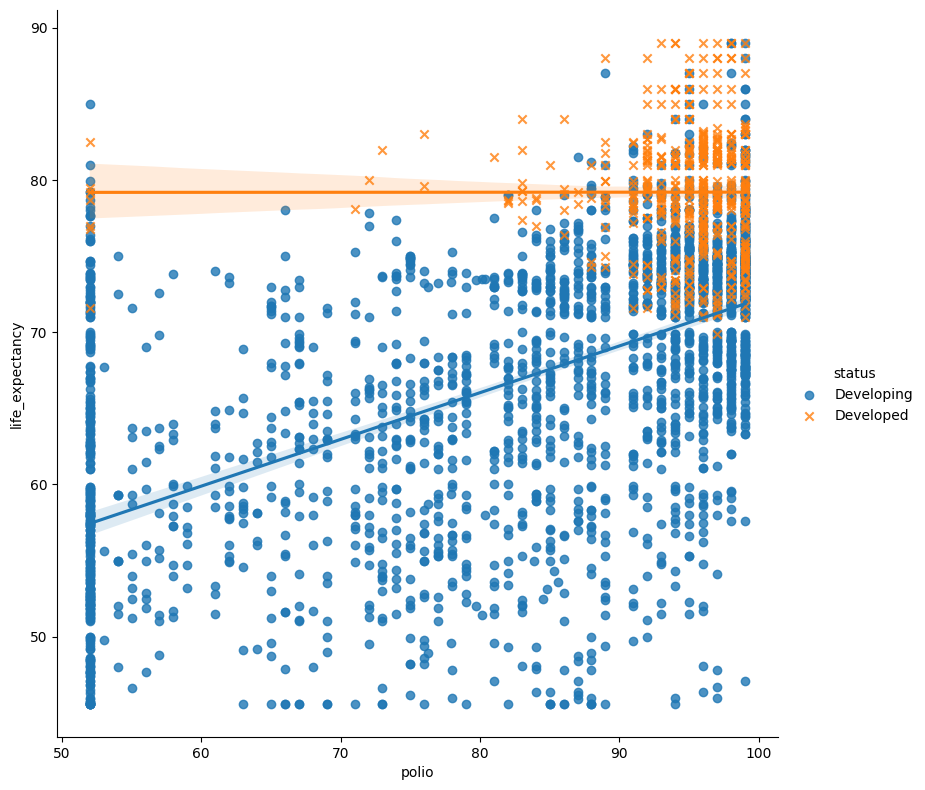

In [174]:
# Life exectancy vs polio
sns.pairplot(wins_df, x_vars=["polio"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");


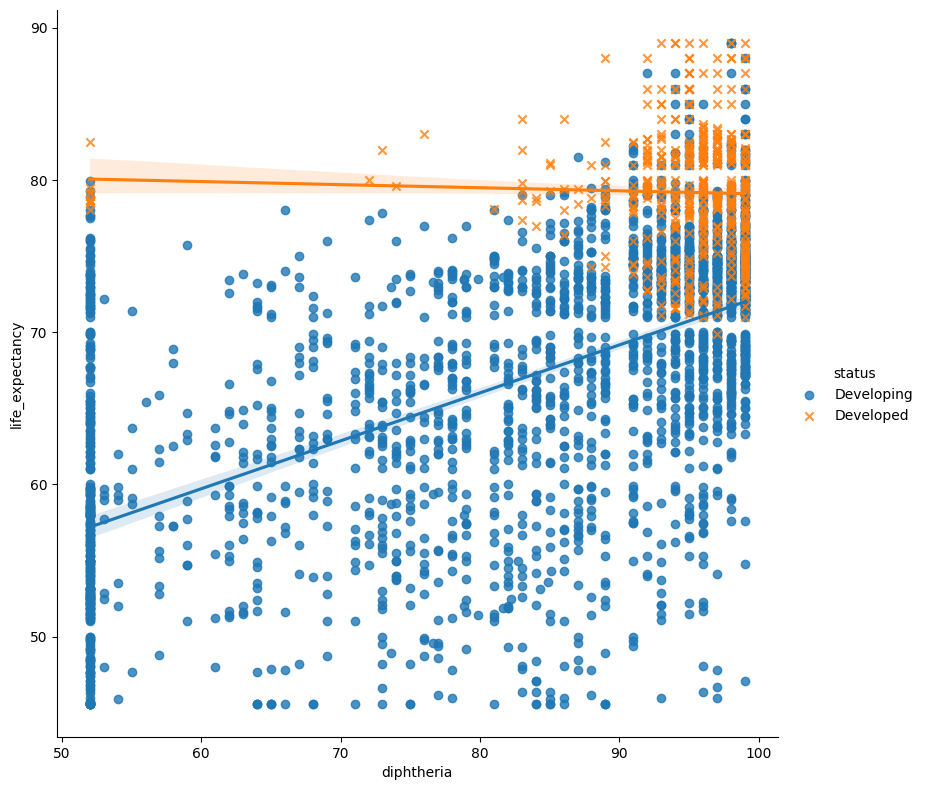

In [175]:
# Life expectancy vs diptheria
sns.pairplot(wins_df, x_vars=["diphtheria"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");


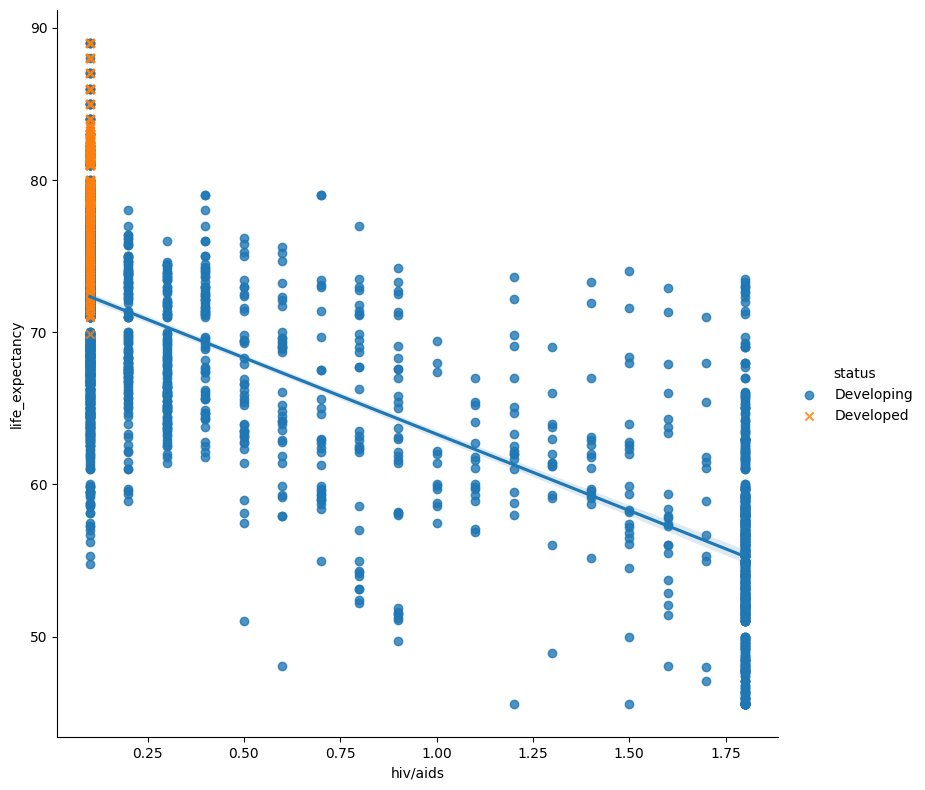

In [176]:
# Life exectancy vs hiv/aids
sns.pairplot(wins_df, x_vars=["hiv/aids"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");


##Q. Showing the effect of schooling and alcohal on developing and developed nations

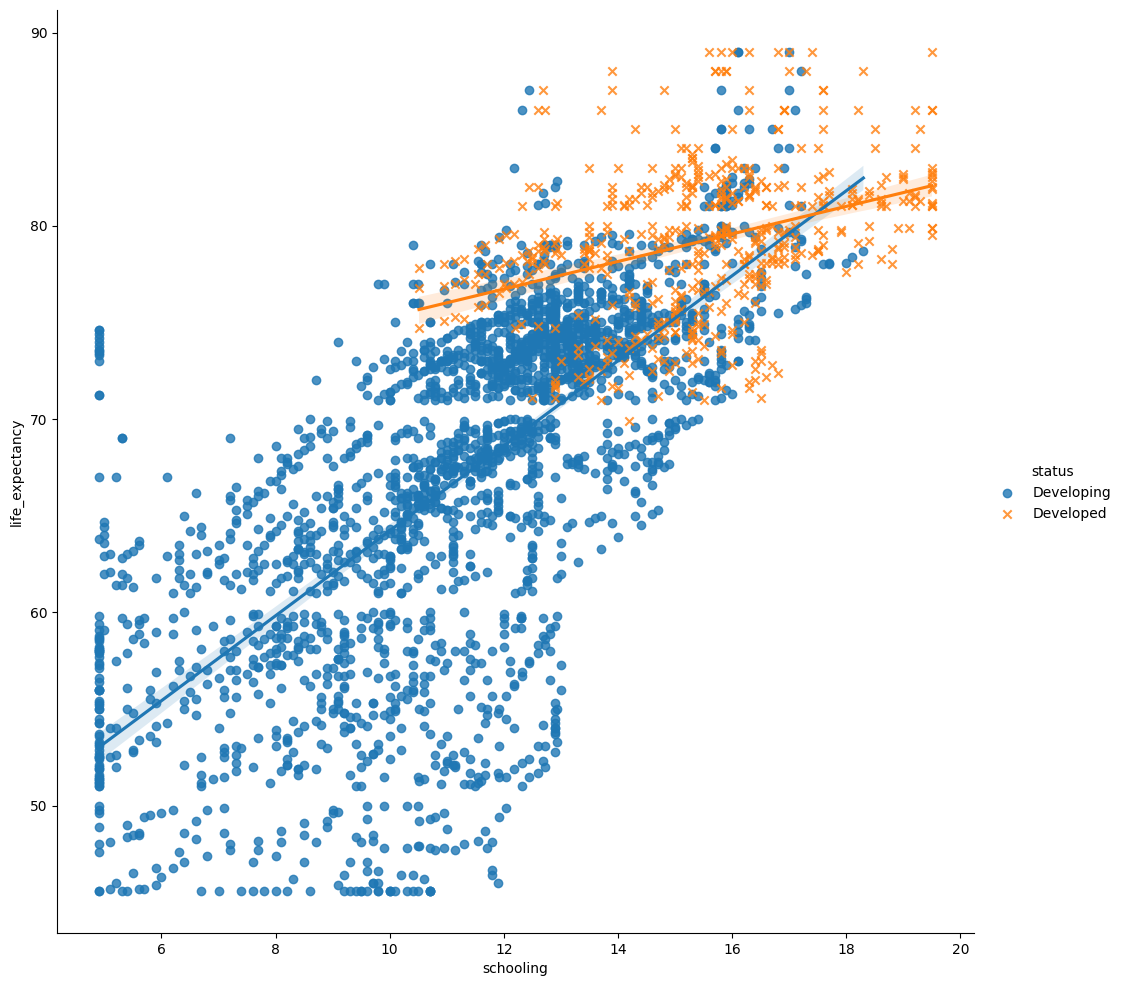

In [177]:
# Life expectancy vs schooling
sns.pairplot(wins_df, x_vars=["schooling"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=10, kind="reg")

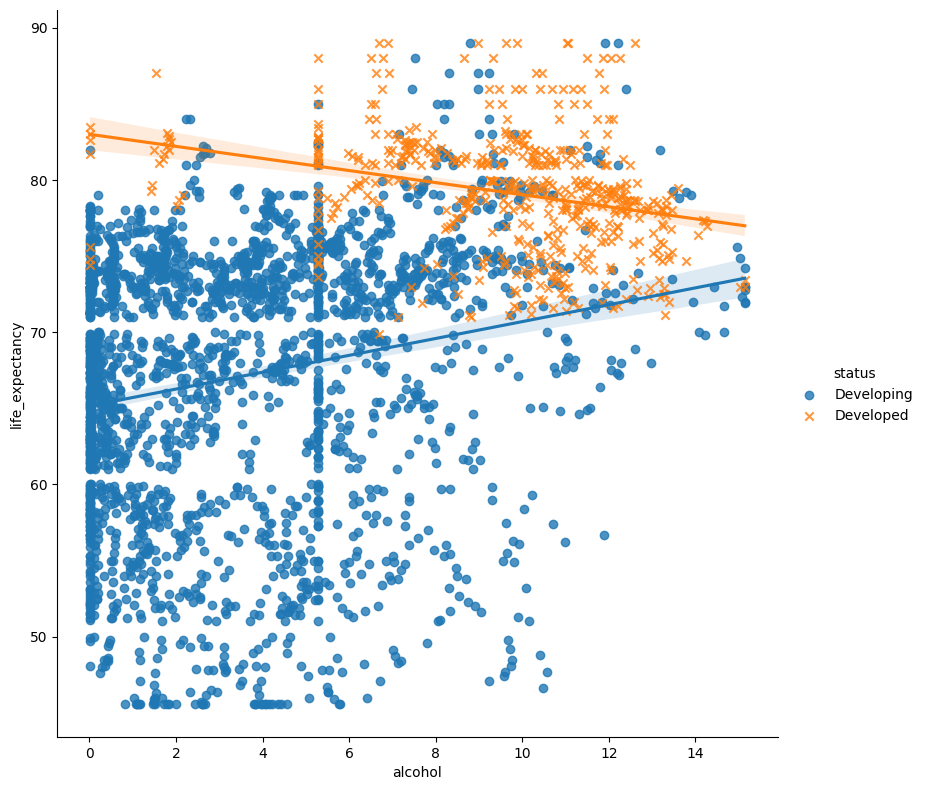

In [178]:
# Life expetancy vs alcohal
sns.pairplot(wins_df, x_vars=["alcohol"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

## Q.showing the effects of GDP and total expenditure on nations

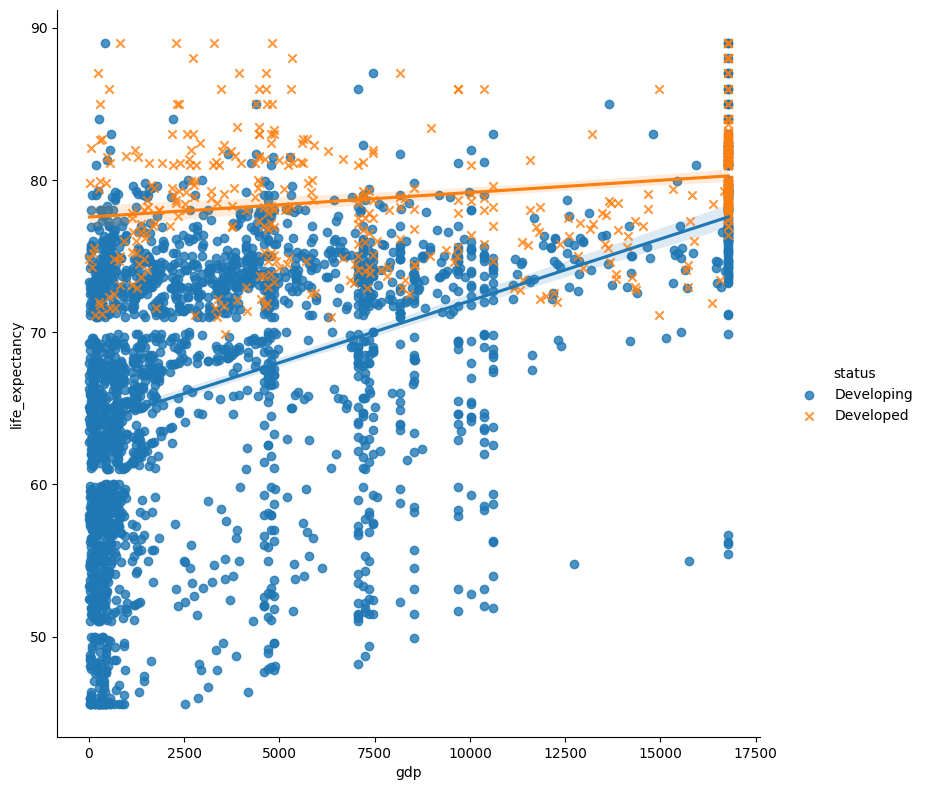

In [179]:
sns.pairplot(wins_df, x_vars=["gdp"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

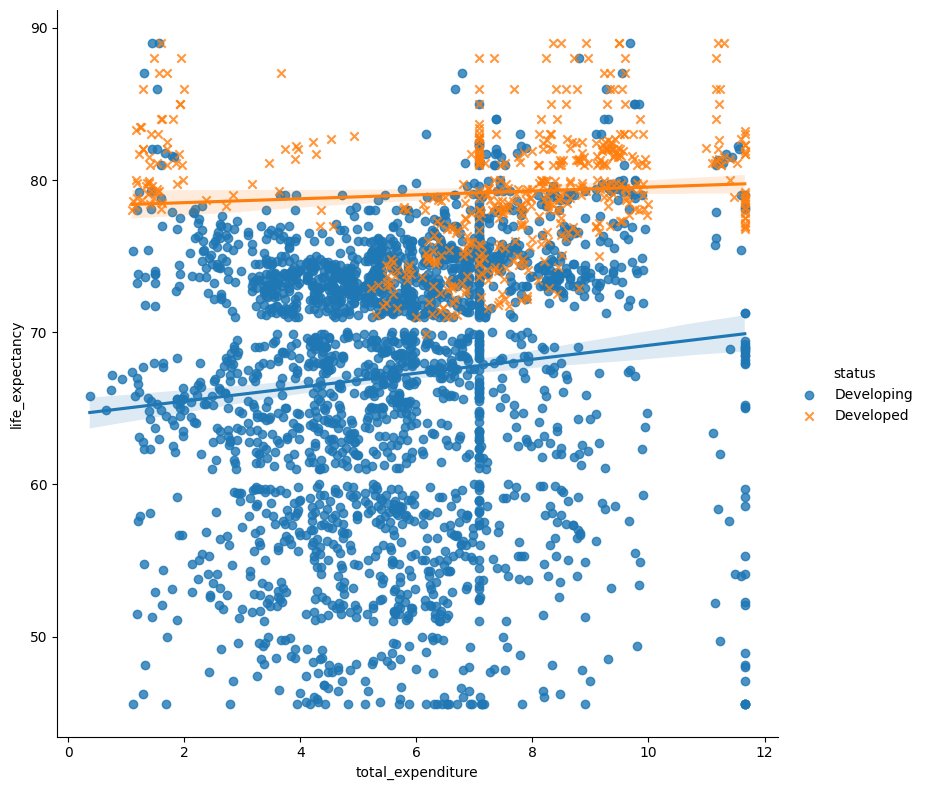

In [180]:
sns.pairplot(wins_df, x_vars=["total_expenditure"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

##Q.Effect on life exectancy on the nations over the years

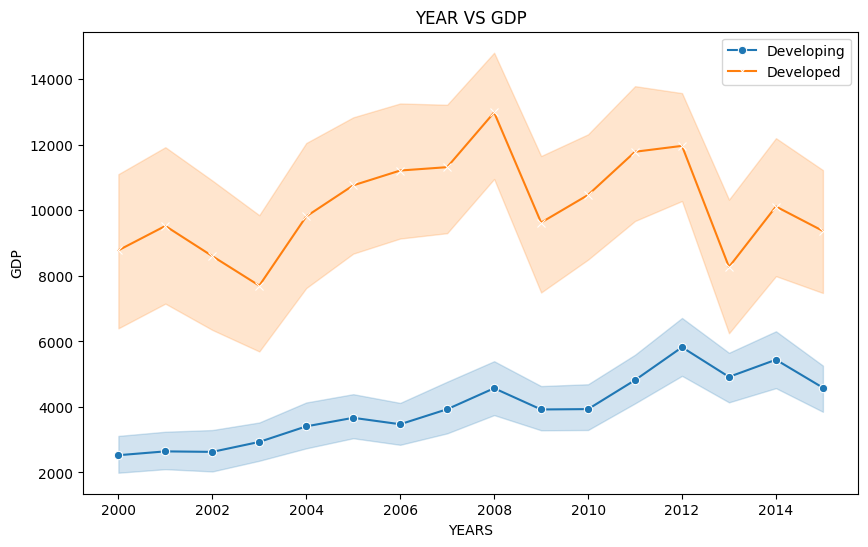

In [181]:
# line graph to show the GDP variation over years
developing_data = wins_df[wins_df['status'] == 'Developing']
developed_data = wins_df[wins_df['status'] == 'Developed']

# Create line plots
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='gdp', data=developing_data, label='Developing', marker='o')
sns.lineplot(x='year', y='gdp', data=developed_data, label='Developed', marker='x')

# Customize the plot
plt.title('YEAR VS GDP')
plt.xlabel('YEARS')
plt.ylabel('GDP')
plt.legend()
plt.show()

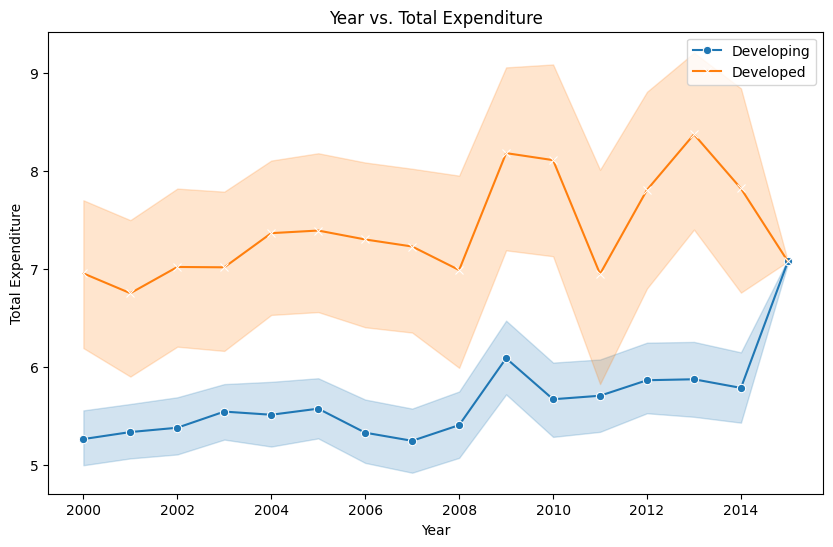

In [182]:
#graph to show the average total expenditure by the nations over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='total_expenditure', data=developing_data, label='Developing', marker='o')
sns.lineplot(x='year', y='total_expenditure', data=developed_data, label='Developed', marker='x')

# Customize the plot
plt.title('Year vs. Total Expenditure')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.legend()
plt.show()

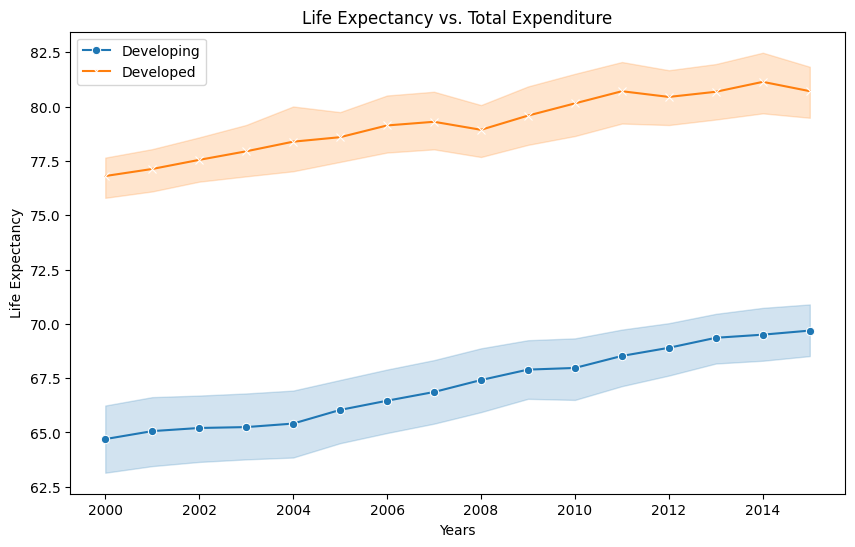

In [183]:
# graph of average life expectacy of the nations over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='life_expectancy', data=developing_data, label='Developing', marker='o')
sns.lineplot(x='year', y='life_expectancy', data=developed_data, label='Developed', marker='x')

# Customize the plot
plt.title('Life Expectancy vs. Total Expenditure')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

## Q.Effect of GDP over life expectancy on developing nations

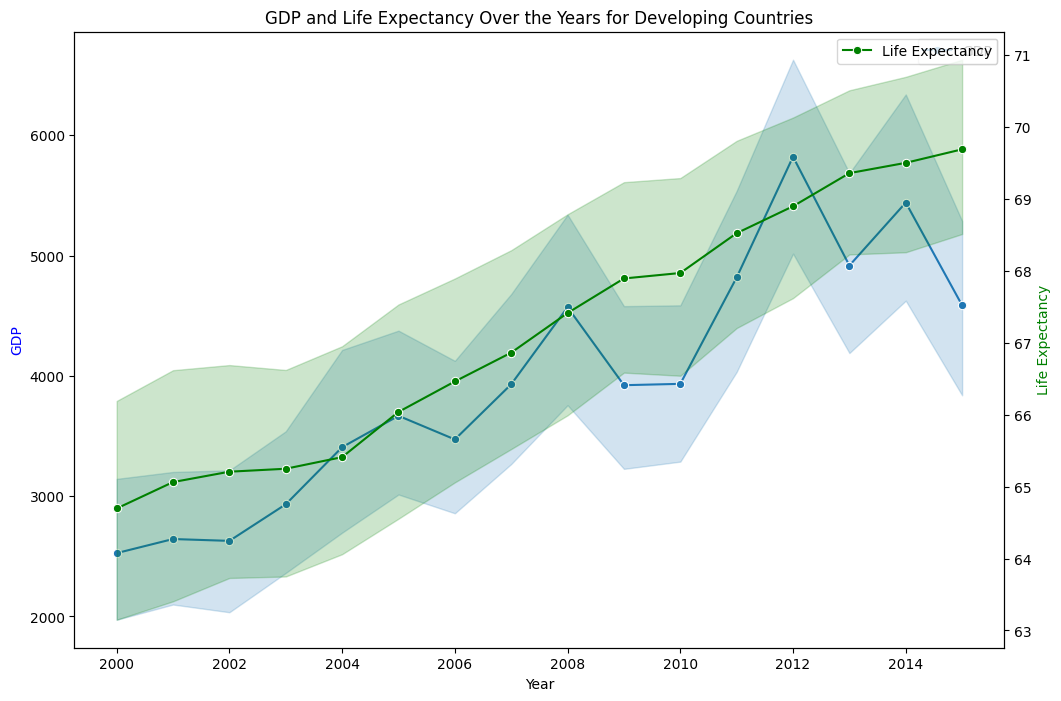

In [119]:
plt.figure(figsize=(12, 8))

# Create line plot for GDP on the left y-axis
ax1 = sns.lineplot(x='year', y='gdp', data=developing_data, label='GDP', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='blue')

# Create a secondary y-axis for life expectancy on the right side
ax2 = ax1.twinx()
sns.lineplot(x='year', y='life_expectancy', data=developing_data, label='Life Expectancy', marker='o', color='green', ax=ax2)
ax2.set_ylabel('Life Expectancy', color='green')

# Customize the plot
plt.title('GDP and Life Expectancy Over the Years for Developing Countries')
plt.show()

## Q.Effect of GDP over life expectancy on developed nations

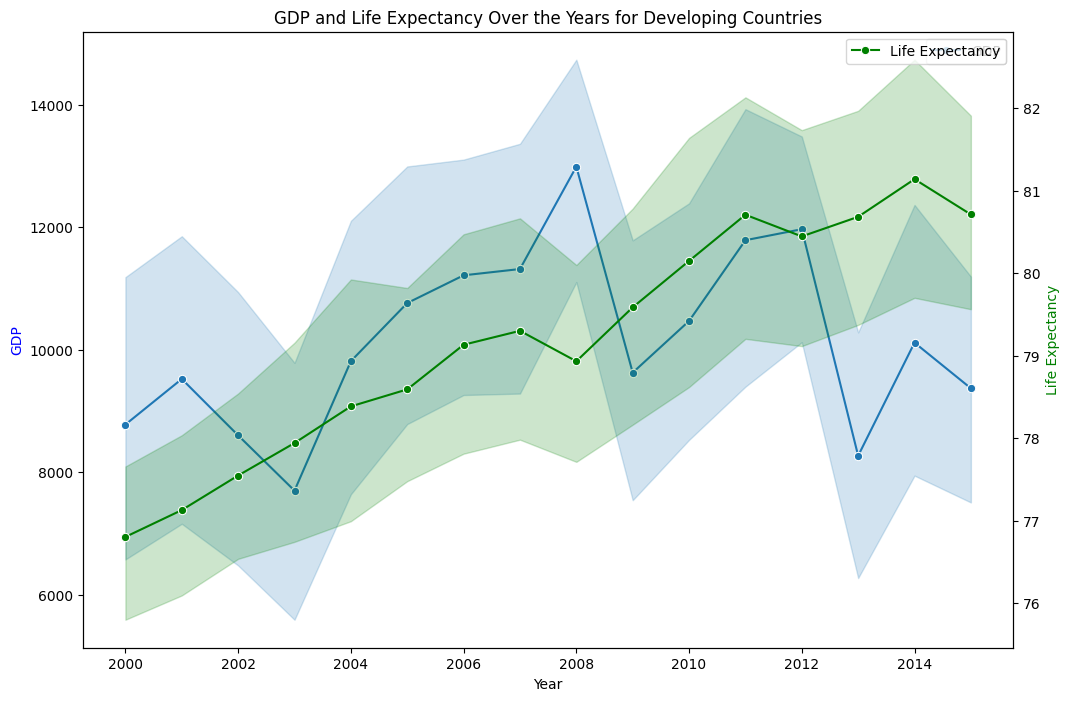

In [120]:
plt.figure(figsize=(12, 8))

# Create line plot for GDP on the left y-axis
ax1 = sns.lineplot(x='year', y='gdp', data=developed_data, label='GDP', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='blue')

# Create a secondary y-axis for life expectancy on the right side
ax2 = ax1.twinx()
sns.lineplot(x='year', y='life_expectancy', data=developed_data, label='Life Expectancy', marker='o', color='green', ax=ax2)
ax2.set_ylabel('Life Expectancy', color='green')

# Customize the plot
plt.title('GDP and Life Expectancy Over the Years for Developing Countries')
plt.show()

#Correlation Analysis

In [121]:
#Correlation Matrix
normalized_df[cont_vars].corr()

life_expectancy  adult_mortality  \
life_expectancy                         1.000000        -0.686189   
adult_mortality                        -0.686189         1.000000   
infant_deaths                          -0.133251         0.034363   
alcohol                                 0.392934        -0.176889   
percentage_expenditure                  0.381543        -0.220342   
hepatitis_b                             0.223382        -0.153423   
measles                                -0.157714         0.036978   
under-five_deaths                      -0.164741         0.053370   
polio                                   0.461850        -0.261424   
total_expenditure                       0.214891        -0.103316   
diphtheria                              0.475914        -0.267573   
hiv/aids                               -0.556647         0.536340   
gdp                                     0.432784        -0.255580   
population                             -0.019253        -0.016703   
thinness_10-19_years                   -0.472746         0.289675   
thinness_5-9_years                     -0.467217         0.293533   
income_composition_of_resources         0.694136        -0.432898   
schooling                               0.716060        -0.416835   

                                 infant_deaths   alcohol  \
life_expectancy                      -0.133251  0.392934   
adult_mortality                       0.034363 -0.176889   
infant_deaths                         1.000000 -0.065645   
alcohol                              -0.065645  1.000000   
percentage_expenditure               -0.046782  0.335416   
hepatitis_b                          -0.169779  0.079760   
measles                               0.486117 -0.051815   
under-five_deaths                     0.995195 -0.068649   
polio                                -0.137422  0.214725   
total_expenditure                    -0.109706  0.298093   
diphtheria                           -0.145858  0.216877   
hiv/aids                             -0.006776 -0.050777   
gdp                                  -0.062775  0.316410   
population                            0.540179 -0.031480   
thinness_10-19_years                  0.424951 -0.417079   
thinness_5-9_years                    0.430241 -0.405974   
income_composition_of_resources      -0.103407  0.415742   
schooling                            -0.137809  0.497659   

                                 percentage_expenditure  hepatitis_b  \
life_expectancy                                0.381543     0.223382   
adult_mortality                               -0.220342    -0.153423   
infant_deaths                                 -0.046782    -0.169779   
alcohol                                        0.335416     0.079760   
percentage_expenditure                         1.000000     0.018604   
hepatitis_b                                    0.018604     1.000000   
measles                                       -0.056596    -0.100805   
under-five_deaths                             -0.050365    -0.180637   
polio                                          0.147373     0.424059   
total_expenditure                              0.161565     0.056810   
diphtheria                                     0.143811     0.517235   
hiv/aids                                      -0.097857    -0.110052   
gdp                                            0.886662     0.074967   
population                                    -0.024179    -0.107015   
thinness_10-19_years                          -0.251175    -0.114276   
thinness_5-9_years                            -0.252706    -0.117665   
income_composition_of_resources                0.379450     0.175509   
schooling                                      0.387520     0.194337   

                                  measles  under-five_deaths     polio  \
life_expectancy                 -0.157714          -0.164741  0.461850   
adult_mortality                  0.036978           0.053370 -0

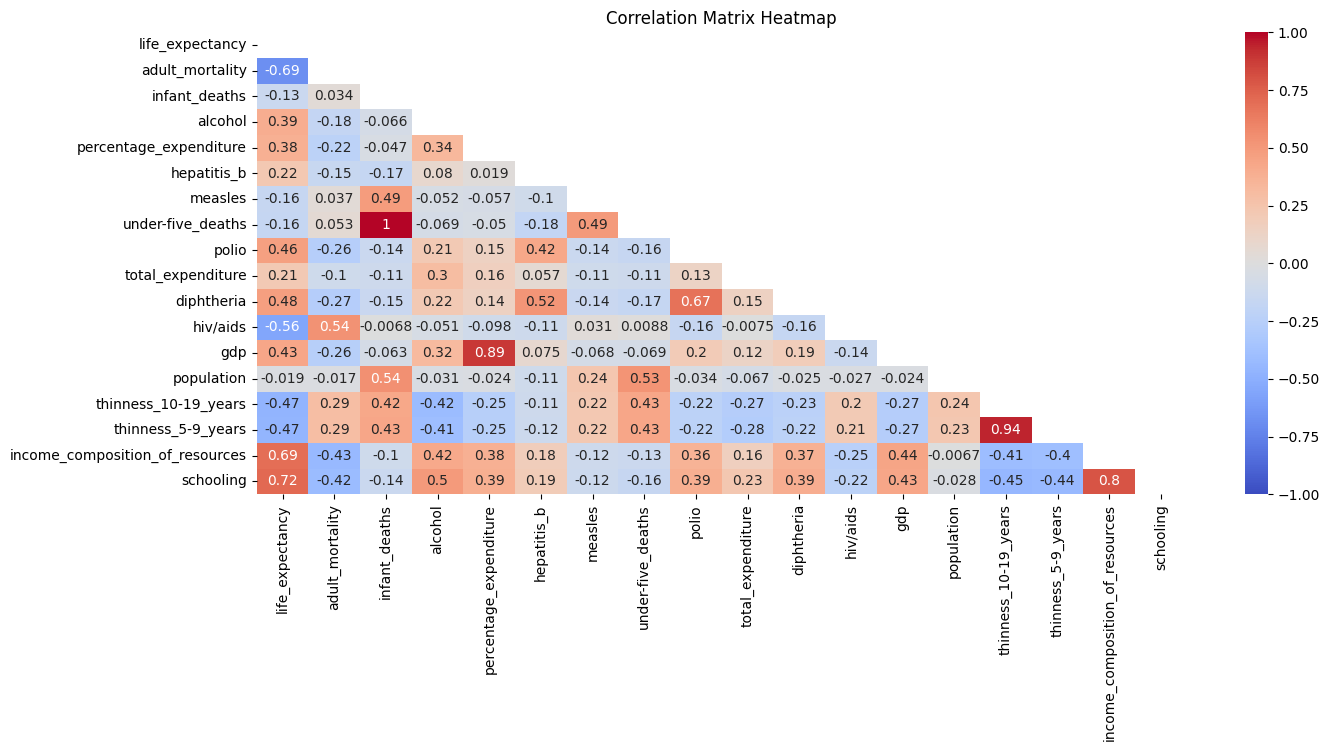

In [122]:
# heatmap (upper triangle)
mask = np.triu(wins_df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(normalized_df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

#Q. predicting percentage expenditure by gdp of developing countries using Simple linear Regression

In [123]:
# Filter data for developing countries
developing_data = normalized_df[normalized_df['status'] == 'Developing']


X = developing_data[["gdp"]]
y = developing_data['percentage_expenditure']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')




Mean Squared Error: 0.0007758790479359978


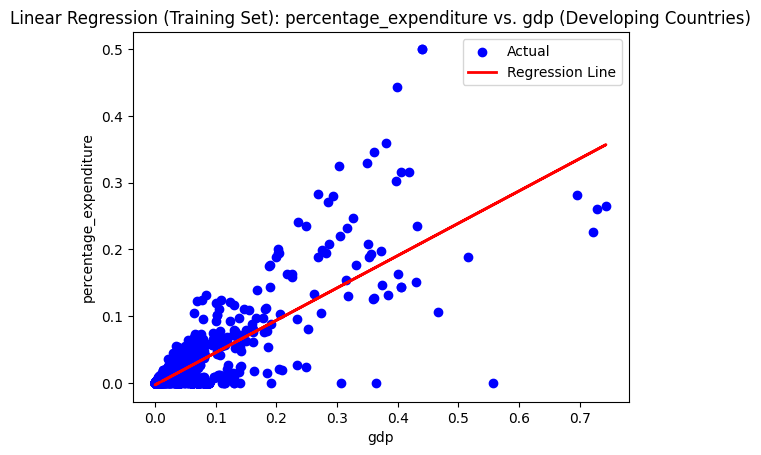

In [124]:
# Make predictions on the training set


# Plot the regression line on the training set
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('gdp')
plt.ylabel('percentage_expenditure')
plt.title('Linear Regression (Training Set): percentage_expenditure vs. gdp (Developing Countries)')
plt.legend()
plt.show()

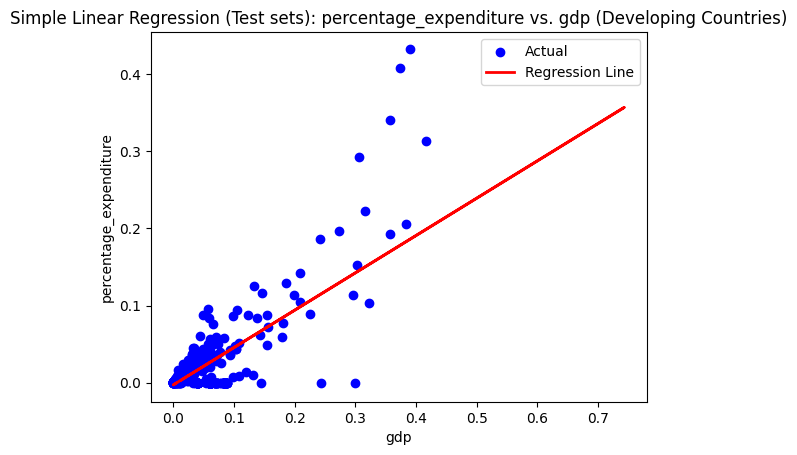

In [125]:

# Plot the regression line(test set)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.xlabel('gdp')
plt.ylabel('percentage_expenditure')
plt.title('Simple Linear Regression (Test sets): percentage_expenditure vs. gdp (Developing Countries)')
plt.legend()
plt.show()

<ipython-input-126-829de4a59332>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Regression Line')


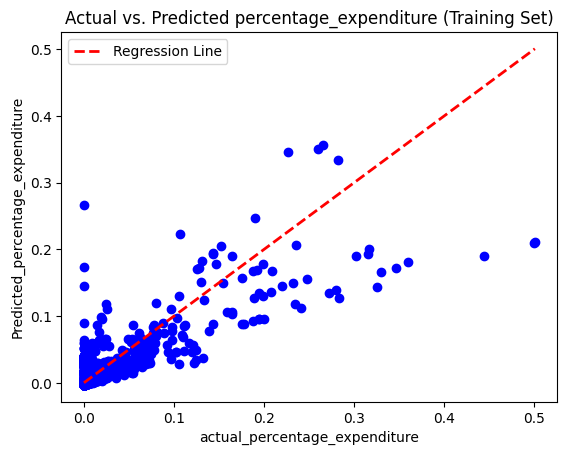

In [126]:
# Plot the actual vs. predicted values on the training set
plt.scatter(y_train, model.predict(X_train), color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Regression Line')
plt.xlabel('actual_percentage_expenditure')
plt.ylabel('Predicted_percentage_expenditure')
plt.title('Actual vs. Predicted percentage_expenditure (Training Set)')
plt.legend()
plt.show()

In [127]:

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.0007758790479359978
R-squared: 0.6361290678569542


In [128]:
from operator import add
#Generating report
# Add a constant
X = sm.add_constant(X)
#Regression model
model1 = sm.OLS(endog= y, exog= X).fit()

print(model1.summary())


                              OLS Regression Results                              
Dep. Variable:     percentage_expenditure   R-squared:                       0.626
Model:                                OLS   Adj. R-squared:                  0.626
Method:                     Least Squares   F-statistic:                     4066.
Date:                    Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                            16:56:28   Log-Likelihood:                 5360.3
No. Observations:                    2426   AIC:                        -1.072e+04
Df Residuals:                        2424   BIC:                        -1.070e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

 out comes: a. The p-values associated with the coefficients (const and gdp) are both less than 0.05, indicating that they are statistically significant
 b.. The R-squared value of 0.626 suggests that approximately 62.6% of the variance in percentage_expenditure is explained by the model.

# Q.pridicting the life expectancy by Multilinear Regression

In [129]:
# Filter data for developing countries
developing_data = normalized_df[normalized_df['status'] == 'Developing']
# Multilinear regression
X = developing_data[['income_composition_of_resources', 'thinness_5-9_years', 'thinness_10-19_years', 'gdp', 'diphtheria', 'polio', 'percentage_expenditure']]
y = developing_data['life_expectancy']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Coefficients: [ 0.33078713 -0.05017721 -0.12331665  0.10566915  0.13172878  0.09300464
  0.37530057]
Intercept: 0.2239339679971744
Mean Squared Error: 0.013177846098970939


<ipython-input-130-3b06addac672>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Regression Line')


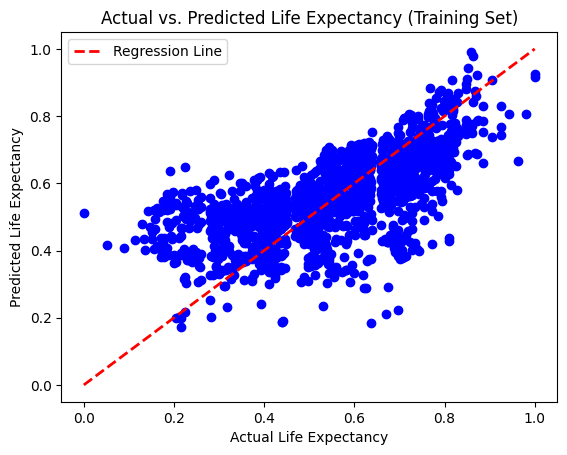

In [130]:
# Plot the actual vs. predicted values on the training set
plt.scatter(y_train, model.predict(X_train), color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Regression Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy (Training Set)')
plt.legend()
plt.show()

In [131]:
#Generating report
# Add a constant
X = sm.add_constant(X)
X.head()


#Regression model
model= sm.OLS( y_train, X_train).fit()
print(model.summary())




                                 OLS Regression Results                                
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              5724.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):                        0.00
Time:                        16:56:29   Log-Likelihood:                          1198.8
No. Observations:                1940   AIC:                                     -2384.
Df Residuals:                    1933   BIC:                                     -2345.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

out comes:Adj.a. R-squared (uncentered): 0.529 (R-squared adjusted for the number of predictors in the model)

b. Coefficients and P-values:

income_composition_of_resources: Coefficient 0.3987, P-value < 0.05 (statistically significant)

thinness_5-9_years: Coefficient -0.0441, P-value > 0.05 (not statistically significant)

thinness_10-19_years: Coefficient -0.1097, P-value < 0.05 (statistically significant)

gdp: Coefficient 0.0578, P-value > 0.05 (not statistically significant)

diphtheria: Coefficient 0.1775, P-value < 0.05 (statistically significant)

polio: Coefficient 0.1259, P-value < 0.05 (statistically significant)

percentage_expenditure: Coefficient 0.2422, P-value < 0.05 (statistically significant)

In [132]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.013177846098970939
